In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 4a

In [2]:
##### Part a #####
# Load in training data and labels

face_data_dict = np.load("face_emotion_data.npz")
face_features = face_data_dict["X"]
face_labels = face_data_dict["y"]
n, p = face_features.shape

# Solve the least-squares solution.
# Weights is the array of weight coefficients
# TODO: find weights
weights = np.linalg.inv(face_features.T @ face_features) @ face_features.T @ face_labels

print(f"Part 4a. Found weights:\n{weights}")

Part 4a. Found weights:
[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


## Problem 4 c

In [3]:
def lstsq_cv_err(features: np.ndarray, labels: np.ndarray, subset_count: int=8) -> float:
    """
    Estimate the error of a least-squares classifier
    using cross-validation. Use subset_count different 
    train/test splits with each subset acting as the
    holdout set once.
    
    Parameters:
        features (np.ndarray): dataset features as a 2D
            array with shape (sample_count, feature_count)
        labels (np.ndarray): dataset class labels (+1/-1)
            as a 1D array with length (sample_count)
        subset_count (int): number of subsets to divide the 
            dataset into
            Note: assume that subset_count divides the 
                dataset evenly
                
    Returns: 
        cls_err (float): estimated classification error
            rate of least-squares method
    """
    sample_count, feature_count = features.shape
    subset_size = sample_count // subset_count
    # Reshape arrays for easier subset-level manipulation
    features = features.reshape(subset_count, subset_size,
                                feature_count)
    labels = labels.reshape(subset_count, subset_size)
    
    subset_idcs = np.arange(subset_count)
    train_set_size = (subset_count - 1) * subset_size
    subset_err_counts = np.zeros(subset_count)
    
    for i in range(subset_count):
        # TODO: select relevant dataset,
        # fit and evaluate a linear model,
        # then store errors in subset_err_counts[i]
        train_data = np.concatenate(np.delete(features,i,axis=0))
        test_data = features[i]
        train_labels = np.concatenate(np.delete(labels,i,axis=0))
        test_labels = labels[i]
        
        train_weights = np.linalg.inv(train_data.T @ train_data) @ train_data.T @ train_labels
        preds = np.where(test_data @ train_weights >=0,1,-1)
        err_count = test_labels.shape[0] - np.count_nonzero(test_labels == preds)
        subset_err_counts[i] = err_count
    
    # Average over the entire dataset to find the 
    # classification error
    cls_err = np.sum(subset_err_counts) / (subset_count * subset_size)
    return cls_err

# Run on the dataset with all features included
full_feat_cv_err = lstsq_cv_err(face_features, face_labels)
print(f"Error estimate: {full_feat_cv_err * 100:.3f}%")

Error estimate: 4.688%


## Problem 4 e

In [4]:
def lstsq_cv_err(features: np.ndarray, labels: np.ndarray, subset_count: int=8) -> float:
    """
    Estimate the error of a least-squares classifier
    using cross-validation. Use subset_count different 
    train/test splits with each subset acting as the
    holdout set once.
    
    Parameters:
        features (np.ndarray): dataset features as a 2D
            array with shape (sample_count, feature_count)
        labels (np.ndarray): dataset class labels (+1/-1)
            as a 1D array with length (sample_count)
        subset_count (int): number of subsets to divide the 
            dataset into
            Note: assume that subset_count divides the 
                dataset evenly
                
    Returns: 
        cls_err (float): estimated classification error
            rate of least-squares method
    """
    sample_count, feature_count = features.shape
    subset_size = sample_count // subset_count
    # Reshape arrays for easier subset-level manipulation
    features = features.reshape(subset_count, subset_size,
                                feature_count)
    labels = labels.reshape(subset_count, subset_size)
    
    subset_idcs = np.arange(subset_count)
    train_set_size = (subset_count - 1) * subset_size
    subset_err_counts = np.zeros(subset_count)
    
    for i in range(subset_count):
        # TODO: select relevant dataset,
        # fit and evaluate a linear model,
        # then store errors in subset_err_counts[i]
        train_data = np.concatenate(np.delete(features,i,axis=0))
        test_data = features[i]
        train_labels = np.concatenate(np.delete(labels,i,axis=0))
        test_labels = labels[i]
        
        train_weights = np.linalg.inv(train_data.T @ train_data) @ train_data.T @ train_labels
        print(train_weights)
        print(np.argmin(np.abs(train_weights)))
        preds = np.where(test_data @ train_weights >=0,1,-1)
        err_count = test_labels.shape[0] - np.count_nonzero(test_labels == preds)
        subset_err_counts[i] = err_count
    
    # Average over the entire dataset to find the 
    # classification error
    cls_err = np.sum(subset_err_counts) / (subset_count * subset_size)
    return cls_err

# Run on the dataset with all features included
full_feat_cv_err = lstsq_cv_err(face_features, face_labels)
print(f"Error estimate: {full_feat_cv_err * 100:.3f}%")

[ 0.91041778  0.00918976  0.40141401 -0.32425274 -0.05200825  0.01241881
 -0.11750884 -0.03420966 -0.10223542]
1
[ 0.96509442  0.14376855  0.2815907  -0.36587949 -0.01368285  0.00729999
 -0.19015301 -0.09899926 -0.14497313]
5
[ 0.94323221  0.34632076  0.21576937 -0.47637296  0.05743401 -0.04440264
 -0.22623441 -0.08717742 -0.14326328]
5
[ 0.95057284  0.36010262  0.17170438 -0.39965363 -0.03698837  0.00352684
 -0.22439815 -0.02562857 -0.18695421]
5
[ 0.98904732  0.23635813  0.15092244 -0.31409029  0.00750529 -0.03473085
 -0.15501731 -0.11683411 -0.18145734]
4
[ 0.95162553  0.20380173  0.28824369 -0.41078527 -0.02677623 -0.01373647
 -0.1240282  -0.11141277 -0.18399559]
5
[ 0.94104084  0.13361189  0.32923606 -0.38697515 -0.00930223 -0.02867065
 -0.13882858 -0.10526937 -0.15762386]
4
[ 0.9038598   0.23993966  0.3204506  -0.44786928  0.02857411 -0.04489301
 -0.14655297 -0.06252364 -0.19587465]
4
Error estimate: 4.688%


In [21]:
def lstsq_cv_err(features: np.ndarray, labels: np.ndarray, subset_count: int=8) -> float:
    """
    Estimate the error of a least-squares classifier
    using cross-validation. Use subset_count different 
    train/test splits with each subset acting as the
    holdout set once.
    
    Parameters:
        features (np.ndarray): dataset features as a 2D
            array with shape (sample_count, feature_count)
        labels (np.ndarray): dataset class labels (+1/-1)
            as a 1D array with length (sample_count)
        subset_count (int): number of subsets to divide the 
            dataset into
            Note: assume that subset_count divides the 
                dataset evenly
                
    Returns: 
        cls_err (float): estimated classification error
            rate of least-squares method
    """
    sample_count, feature_count = features.shape
    subset_size = sample_count // subset_count
    # Reshape arrays for easier subset-level manipulation
    features = features.reshape(subset_count, subset_size,
                                feature_count)
    labels = labels.reshape(subset_count, subset_size)
    
    subset_idcs = np.arange(subset_count)
    train_set_size = (subset_count - 1) * subset_size
    subset_err_counts = np.zeros(subset_count)
    
    for i in range(subset_count):
        # TODO: select relevant dataset,
        # fit and evaluate a linear model,
        # then store errors in subset_err_counts[i]
        train_data = np.concatenate(np.delete(features,i,axis=0))
        test_data = features[i]
        train_labels = np.concatenate(np.delete(labels,i,axis=0))
        test_labels = labels[i]
        
        train_weights = np.linalg.inv(train_data.T @ train_data) @ train_data.T @ train_labels
        print(np.argmin(np.abs(train_weights)))
        preds = np.where(test_data @ train_weights >=0,1,-1)
        err_count = test_labels.shape[0] - np.count_nonzero(test_labels == preds)
        subset_err_counts[i] = err_count
    
    # Average over the entire dataset to find the 
    # classification error
    cls_err = np.sum(subset_err_counts) / (subset_count * subset_size)
    return cls_err

# Run on the dataset with all features included
full_feat_cv_err = lstsq_cv_err(np.delete(face_features,[1,2,3,4,5,6,7],axis=1), face_labels)
print(f"Error estimate: {full_feat_cv_err * 100:.3f}%")

1
1
1
1
1
1
1
1
Error estimate: 3.906%


## Problem 5

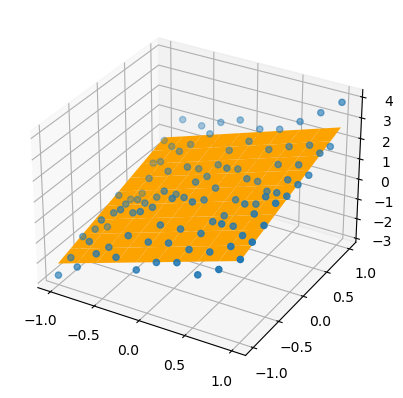

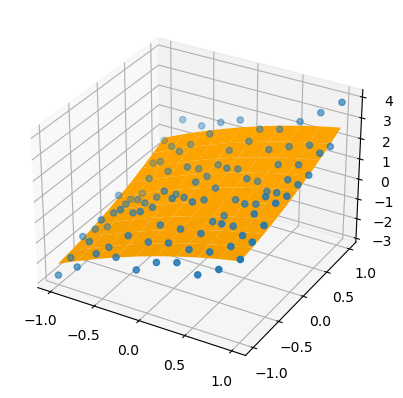

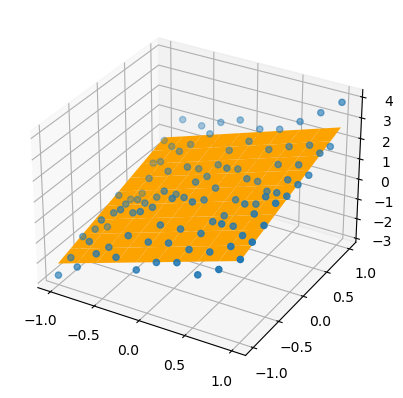

In [35]:
data = np.load('polydata_2D.npz')
x1 = np.ravel(data['x1'])
x2 = np.ravel(data['x2'])
y = data['y']

N = x1.size
p = np.zeros((3,N))

for d in [1,2,3]:
    # Generate the X matrix for this d
    
    # Find the least-squares weight matrix w_d
    
    # Evaluate the best-fit polynomial at each point (x1,x2)
    # and store the result in the corresponding column of p
    if d == 1:
        X = np.array([np.ones(shape = (N)),
                      x1,
                      x2])
    elif d == 2:
        X = np.array([np.ones(shape = (N)),
                      x1,
                      x2,
                      x1 ** 2,
                      x2 ** 2])
    else:
        X = np.array([np.ones(shape = (N)),
                      x1,
                      x2,
                      x1 ** 2,
                      x2 ** 2,
                      x1 ** 3,
                      x2 ** 3,])
    X = X.T
    w_d = np.linalg.inv(X.T @ X) @ X.T @ y
    p[d-1,:] = X @ w_d
    
# Plot the degree 1 surface
Z1 = p[0,:].reshape(data['x1'].shape)
ax = plt.axes(projection='3d')
ax.scatter(data['x1'],data['x2'],y)
ax.plot_surface(data['x1'],data['x2'],Z1,color='orange')
plt.show()

# Plot the degree 2 surface
Z2 = p[1,:].reshape(data['x1'].shape)
ax = plt.axes(projection='3d')
ax.scatter(data['x1'],data['x2'],y)
ax.plot_surface(data['x1'],data['x2'],Z2,color='orange')
plt.show()

# Plot the degree 3 surface
Z3 = p[0,:].reshape(data['x1'].shape)
ax = plt.axes(projection='3d')
ax.scatter(data['x1'],data['x2'],y)
ax.plot_surface(data['x1'],data['x2'],Z3,color='orange')
plt.show()